## Exploratory Data Analysis 
This is Exploratory Data Analysis based on data from Kaggle.
Titled 'Customer Demographics & Shopping Preferences Data' based on this link: 
https://www.kaggle.com/datasets/zahranusratt/us-irs-individual-income-tax-records

There will be no data cleaning , just some exploration and visualization.

### IMPORT, LOAD AND CHECKOUT SUMMARY OF DF

In [1]:
# Import 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset
# Make sure csv is in same folder for vscode
df = pd.read_csv("shopping_behavior_updated (2).csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
# Checkout summary of df
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   str    
 3   Item Purchased          3900 non-null   str    
 4   Category                3900 non-null   str    
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   str    
 7   Size                    3900 non-null   str    
 8   Color                   3900 non-null   str    
 9   Season                  3900 non-null   str    
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   str    
 12  Shipping Type           3900 non-null   str    
 13  Discount Applied        3900 non-null   str    
 14  Promo Code Used         3900 non-null   str    
 15

In [ ]:
# Checkout count of unique row by columns
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [ ]:
df.duplicated().sum()
# No duplicated rows at all.

np.int64(0)

### CORRELATION MATRIX
We start by using correlation matrix on column with numerical data.

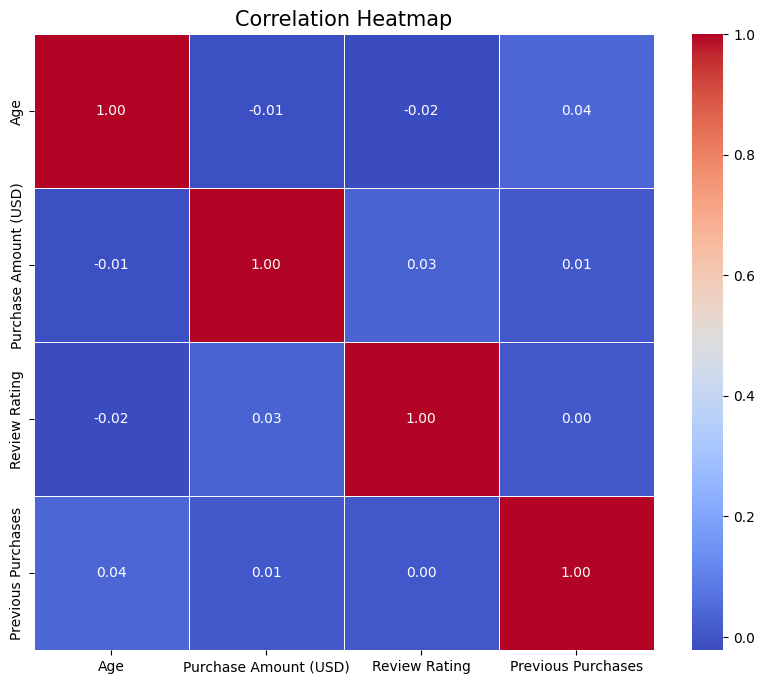

In [21]:
#  Select only the numerical columns for correlation
# These are the columns where math makes sense
cols_to_corr = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
corr_matrix = df[cols_to_corr].corr()

# 2. Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=15)
plt.show()


### CREATE AGE DISTRIBUTION
manually creating bins

In [32]:
# We want to create barchart for distribution of age by bins. We found its max and min
max_age = df['Age'].max()
min_age = df['Age'].min()

print(f"Max: {max_age}, Min: {min_age}")

Max: 70, Min: 18


In [ ]:
# Preparing data for barchart. 
bins = [18, 30, 40, 50, 60, 71] #Note: To include age 70, the last edge should be 71
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False) # right=False means the left edge is inclusive [18, 30)
age_counts = df['Age_Group'].value_counts().sort_index()
age_counts # To see its data


Age_Group
18-29    878
30-39    724
40-49    739
50-59    771
60-70    788
Name: count, dtype: int64

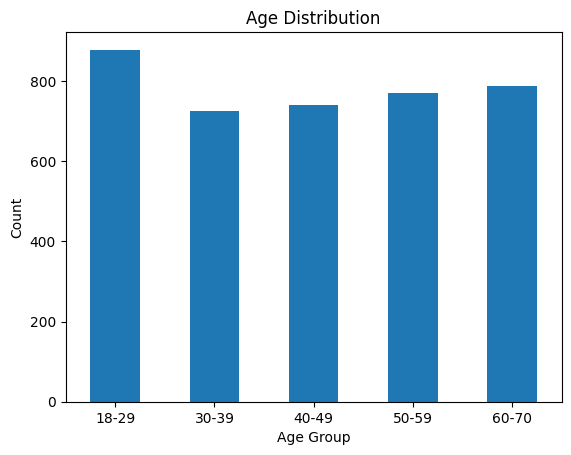

In [ ]:
# Plot it
age_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0) # For 18-29 label not be titled 90 degree.
plt.show()

### CREATE REVIEW DISTRIBUTION
using np.linspace to create bins 

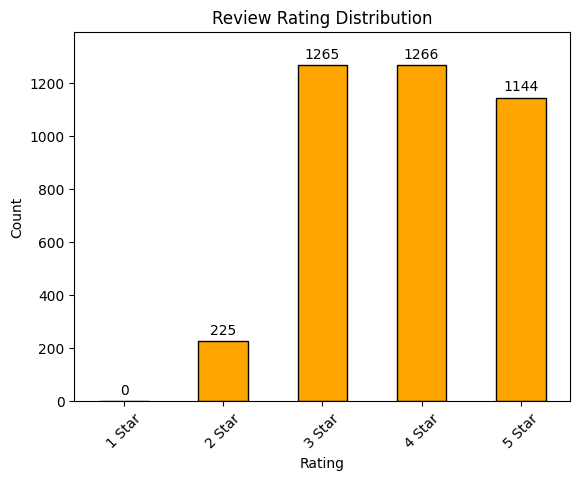

In [ ]:
import numpy as np
edges = np.linspace(1, 5, 6) #Evenly space np.linspace(start, stop, num)
labels_rev = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']

df['Review_Bin'] = pd.cut(df['Review Rating'], bins=edges, labels=labels_rev,include_lowest=True)
review_counts = df['Review_Bin'].value_counts().sort_index()

#  Plot
ax = review_counts.plot(kind='bar', color='orange', edgecolor='black') 
ax.bar_label(ax.containers[0], padding=3) # Data label doesnt work we doesnt capture plot as 'ax' first
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.ylim(0, review_counts.max() * 1.1) # To adjust gap for label. adjust 1.1 value to find out
plt.xticks(rotation=45) # Label x is angled at 45.
plt.show()

### CREATE COUNTPLOT FOR GENDER COLUMN
Creating simple chart to look at Gender distribution

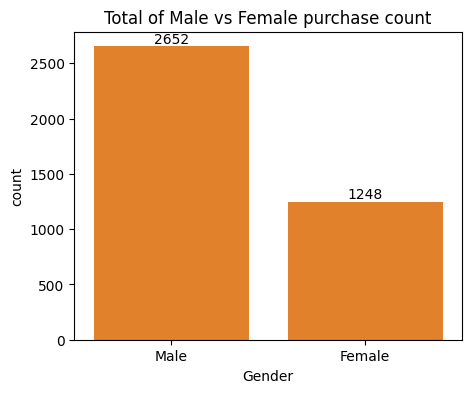

In [12]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Gender") # Use only "Gender" column to count
ax = sns.countplot(data=df, x="Gender") 
ax.bar_label(ax.containers[0]) # This is to place value above bar

#This is setting for axis

plt.title("Total of Male vs Female purchase count")
plt.show()

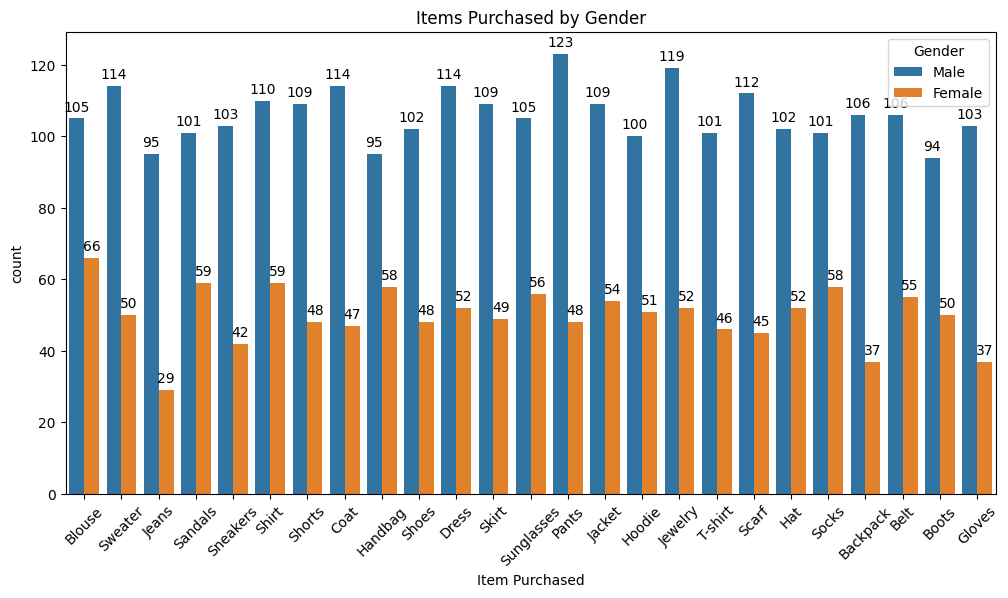

In [67]:
plt.figure(figsize=(12, 6))

# 1. Use 'Item Purchased' on the X-axis
# 2. Use 'Gender' as the 'hue' to split the bars
ax = sns.countplot(data=df, x="Item Purchased", hue="Gender")

# 3. Add the data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

# 4. Rotate X-axis labels so they don't overlap
plt.xticks(rotation=45)

plt.title("Items Purchased by Gender")
plt.show()

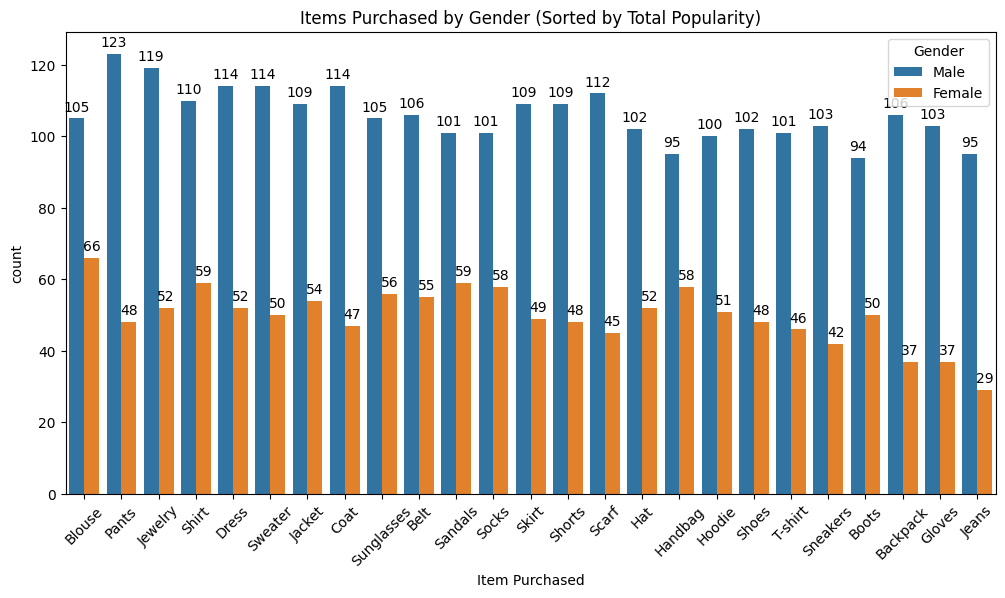

In [3]:
plt.figure(figsize=(12, 6))

# 1. Create the sorted list of items
# This counts the occurrences and returns the names in descending order
sorted_items = df["Item Purchased"].value_counts().index

# 2. Pass that list into the 'order' argument
ax = sns.countplot(
    data=df, 
    x="Item Purchased", 
    hue="Gender", 
    order=sorted_items
)

# Add labels and styling
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.xticks(rotation=45)
plt.title("Items Purchased by Gender (Sorted by Total Popularity)")
plt.show()

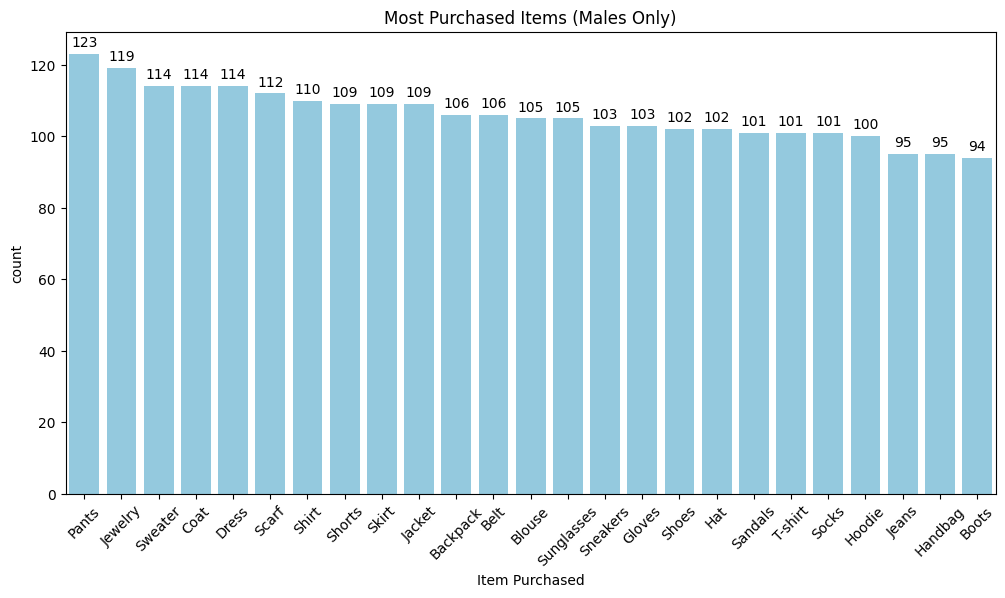

In [4]:
# 1. Filter the data to include only Males
male_df = df[df["Gender"] == "Male"]

# 2. Get the sorted order (most frequent items for Men)
male_item_order = male_df["Item Purchased"].value_counts().index

plt.figure(figsize=(12, 6))

# 3. Plot using the filtered 'male_df'
ax = sns.countplot(
    data=male_df, 
    x="Item Purchased", 
    order=male_item_order,
    color="skyblue" # Since there's no hue, we pick one color
)

# 4. Add data labels
ax.bar_label(ax.containers[0], padding=3)

plt.xticks(rotation=45)
plt.title("Most Purchased Items (Males Only)")
plt.show()

### CREATING PIE CHART FOR CATEGORY
First , we create a table of counts and percentage of total 
Then, we used that table to produce pie chart with total and percentage

In [5]:
# 1. Get value counts
counts = df['Category'].value_counts()

# 2. Calculate percentages
percent = df['Category'].value_counts(normalize=True) * 100

# 3. Combine into a summary table
# We use pd.concat to put them side-by-side
summary_table = pd.concat([counts, percent], axis=1)

# 4. Rename columns for clarity
summary_table.columns = ['Counts', 'Percentage (%)']

# Optional: Format percentage to 2 decimal places
summary_table['Percentage (%)'] = summary_table['Percentage (%)'].map('{:.2f}%'.format)

print(summary_table)

             Counts Percentage (%)
Category                          
Clothing       1737         44.54%
Accessories    1240         31.79%
Footwear        599         15.36%
Outerwear       324          8.31%


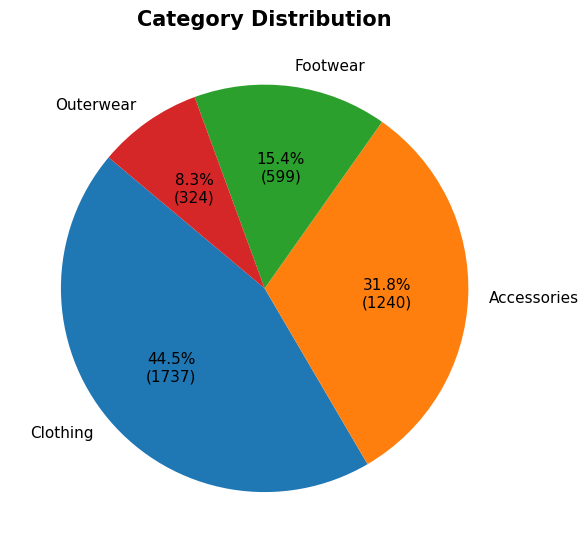

In [ ]:
# This pie chart is to make counts and percentage of count inside chart
# This have to be defined 
def make_label(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.figure(figsize=(6, 6))

plt.pie(
    summary_table['Counts'], # This accept one value only
    labels=summary_table.index, 
    # The lambda sends the percentage to our helper function
    autopct=lambda pct: make_label(pct, summary_table['Counts']),
    startangle=140,
    textprops={'fontsize': 11}
)

plt.title('Category Distribution', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

### BOXPLOT FOR PUCHASE AMOUNT BY CATEGORY
A boxplot visually summarizes a dataset using five key numbers, called the five-number summary, Minimum, Q1 ,Median ,Q2, ,Q3,Maximum.
It’s especially good for comparing distributions, detecting outliers,seeing skewness


<Figure size 1200x700 with 0 Axes>

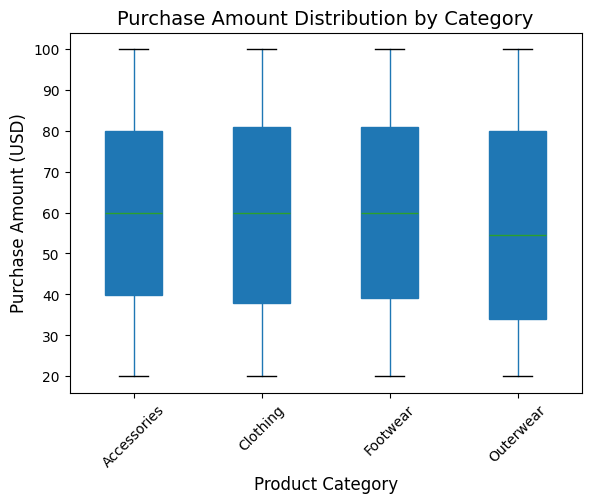

In [ ]:
# 1. Set the figure size
plt.figure(figsize=(12, 7))

# 2. Create the boxplot
# 'patch_artist=True' allows us to fill the boxes with color
df.boxplot(column='Purchase Amount (USD)', by='Category', grid=False,patch_artist=True)

# 3. Customizing the visuals
plt.title('Purchase Amount Distribution by Category', fontsize=14)
plt.suptitle('') # Removes the redundant "Boxplot grouped by Category" title
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)

# Rotate labels so they are readable
plt.xticks(rotation=45)

plt.show();

-The data is uniformly distributed across all category except for outerwear.  Which is weird, you would have suspected they all should be varies. 
- Medians and interquartile ranges are almost identifical across categories.
-This data has no outliers. No dots outside whisker
- Highly possible this is a fake data. 